In [1]:
from backbones.sana import SANA

# 사용 예
model = SANA()
print(model)

/home/lee08/miniconda3/envs/comfyui/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
import matplotlib.pyplot as plt

def show_compare(euler_img, dpm_img):
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    axes[0].imshow(euler_img); axes[0].axis('off'); axes[0].set_title('Euler')
    axes[1].imshow(dpm_img);  axes[1].axis('off'); axes[1].set_title('DPM-Solver')
    plt.tight_layout()
    plt.show()


def callback_func(step,x_t):
    print(step,x_t.shape)  #이거만들어서, euler 안에 callback


0 torch.Size([1, 32, 32, 32])
1 torch.Size([1, 32, 32, 32])
2 torch.Size([1, 32, 32, 32])
3 torch.Size([1, 32, 32, 32])
4 torch.Size([1, 32, 32, 32])
5 torch.Size([1, 32, 32, 32])
6 torch.Size([1, 32, 32, 32])
7 torch.Size([1, 32, 32, 32])
8 torch.Size([1, 32, 32, 32])
9 torch.Size([1, 32, 32, 32])


100%|██████████| 9/9 [00:01<00:00,  7.40it/s]


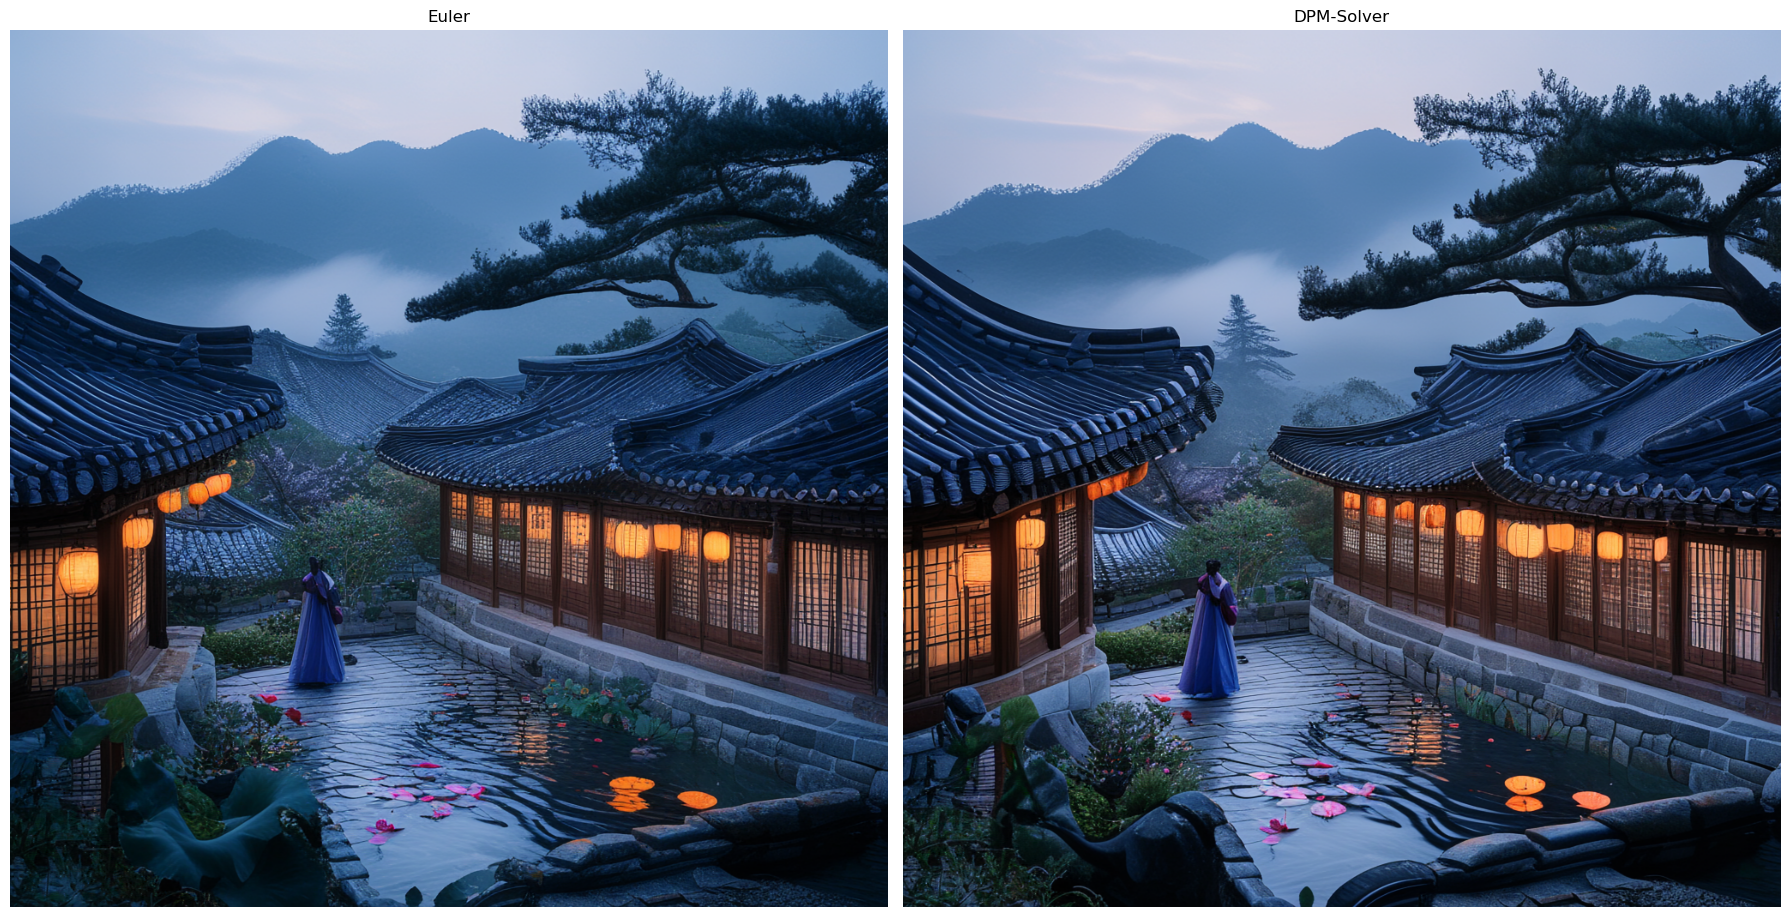

In [ ]:
from solvers.euler_solver import Euler_Solver
from solvers.dpm_solver import DPM_Solver

pos_text = "A serene twilight view of a traditional Korean hanok village nestled between misty mountain slopes: curved midnight-blue tiled eaves, softly glowing paper lanterns swaying in the breeze; ancient pine trees arching over stone pathways; intricate wooden lattice windows casting delicate shadows; a lone scholar in flowing hanbok practicing calligraphy beside a koi pond with lotus petals drifting on the water; cinematic 8K ultra-realism with dynamic volumetric moonlight filtering through morning mist; painterly strokes blending classical Joseon-era ink wash with modern hyperrealism; shot on RED Monstro 8K, 50 mm f/1.2 lens; subtle film grain; maximum fidelity; emotional atmosphere."
neg_text = "lowres, bad anatomy, deformed, blurry, pixelated, oversaturated, underexposed, overexposed, artifact, jpeg artifacts, watermark, text, logo, extra limbs, mutated hands, unnatural colors, noisy background, out of focus, poor composition, cultural clichés, stereotype exaggeration, flat lighting, glitch"

# 1. 모든 매개변수들을 먼저 변수로 설정합니다
guidance_scale = 4.5
num_steps = 20
seed = 42
steps = 10
flow_shift=3.0

model_fn, noise_schedule, latents = model.get_model_fn(    
    pos_text=pos_text, 
    neg_text=neg_text, 
    guidance_scale=guidance_scale, 
    num_steps=num_steps, 
    seed=seed
)
solver = Euler_Solver(model_fn, noise_schedule)
latent_samples = solver.sample(latents, steps=steps, skip_type='time_uniform_flow', flow_shift=flow_shift, callback=callback_func)
pixel_samples = model.decode_vae(latent_samples)
euler_sample = pixel_samples[0]

solver = DPM_Solver(model_fn, noise_schedule, algorithm_type="dpmsolver++")
latent_samples = solver.sample(latents, steps=steps, order=2, skip_type="time_uniform_flow", method="multistep", flow_shift=flow_shift)
pixel_samples = model.decode_vae(latent_samples)
dpm_sample = pixel_samples[0]

show_compare(euler_sample, dpm_sample)